In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_tracking = pd.read_csv("C:/Users/Ousmane Kontao/Desktop/Projet_Data/data_brute/tracking GPS - pedagogie emergente.csv", low_memory=False)  # localement
df_seq = pd.read_csv("C:/Users/Ousmane Kontao/Desktop/Projet_Data/data_brute/event sequencage - pedagogie emergente.csv", sep=';')
df_infos = pd.read_csv("C:/Users/Ousmane Kontao/Desktop/Projet_Data/data_brute/informations - pedagogie emergente.csv", sep=';')


In [23]:
df_seq.head(3)

,Position,Possession,Condition,Serie,Defense,Cote,Passeur,Receveur,Contact,Pied,Resultat
0,37320,1,EMERGENT,PRE,OUVERT,GAUCHE,1.0,NaN,NaN,NaN,NaN
1,37960,1,EMERGENT,PRE,OUVERT,GAUCHE,NaN,2.0,NaN,NaN,NaN
2,39000,1,EMERGENT,PRE,OUVERT,GAUCHE,2.0,NaN,NaN,NaN,NaN


In [24]:
df_seq['Time'] = df_seq['Position'] / 1000
df_seq = df_seq[['Time'] + [col for col in df_seq.columns if col != 'Time']]

In [25]:
df_seq.drop(columns=["Position"], inplace=True)

In [26]:
df_seq.head(1)

,Time,Possession,Condition,Serie,Defense,Cote,Passeur,Receveur,Contact,Pied,Resultat
0,37.32,1,EMERGENT,PRE,OUVERT,GAUCHE,1.0,NaN,NaN,NaN,NaN


Statistiques globales

In [35]:
nb_possessions = df_seq["Possession"].unique()
print(f"Nombre de possessions : {len(nb_possessions)}")

Nombre de possessions : 44


Repartion des resultats :
Resultat
ballon perdu    30
essai           11
4                1
3                1
6                1
Name: count, dtype: int64


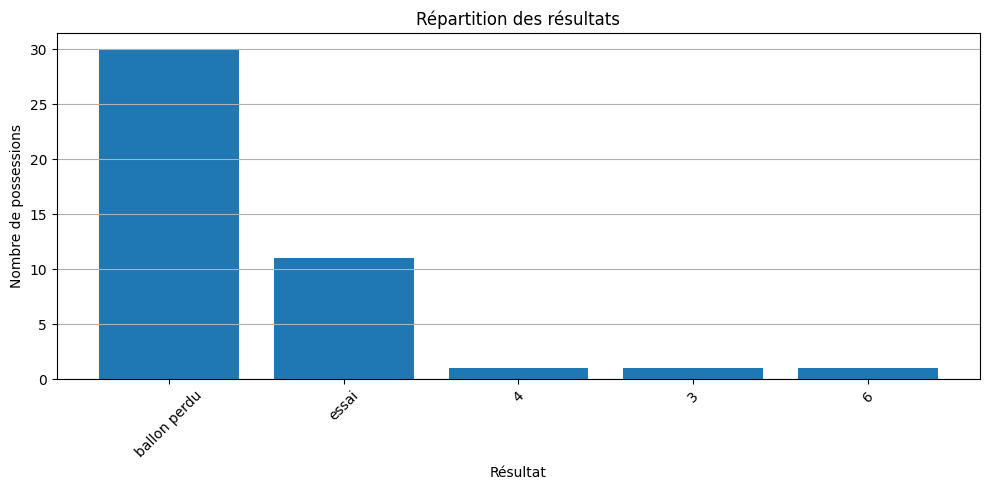

In [44]:
repartition_resultats = df_seq[df_seq["Resultat"].notna()]["Resultat"].value_counts()
print(f"Repartion des resultats :\n{repartition_resultats}")
# On va faire un graphique pour voir la repartition des resultats   
plt.figure(figsize=(10, 5))
plt.bar(repartition_resultats.index, repartition_resultats.values)
plt.title("Répartition des résultats")
plt.xlabel("Résultat")
plt.ylabel("Nombre de possessions")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()


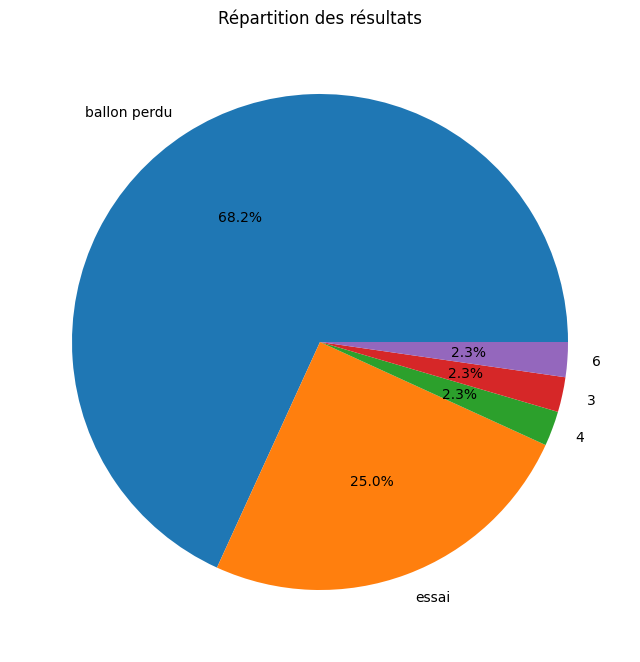

In [45]:
repartition_resultats.plot.pie(
    autopct='%1.1f%%', 
    figsize=(8, 16), 
    title="Répartition des résultats", 
    ylabel=''
)
plt.show()

Durée moyenne de possession : 7.32 secondes


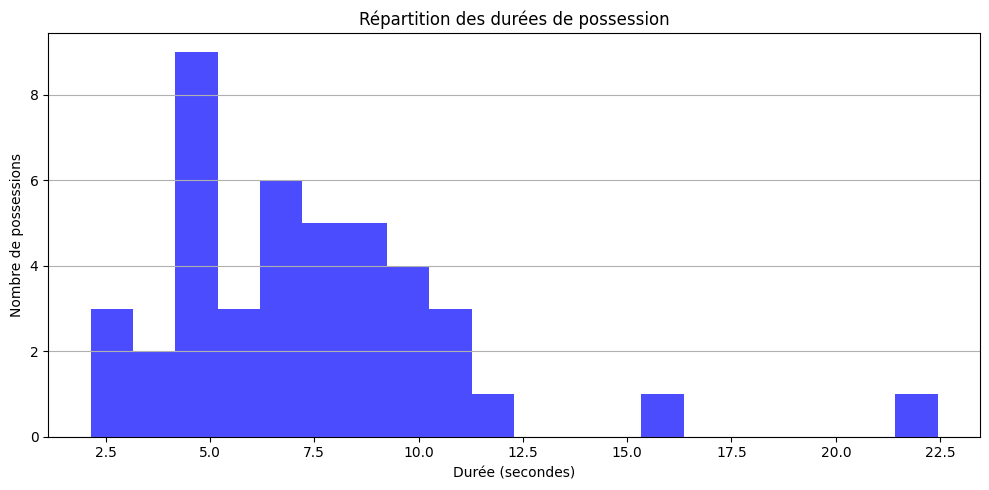

In [ ]:
durées = []
for p in df_seq["Possession"].unique():
    times = df_tracking[df_tracking["Possession"] == p]["Time"]
    if len(times) > 0:
        durée = times.max() - times.min()
        durées.append(durée)

durée_moyenne_possession = sum(durées) / len(durées)
print(f"Durée moyenne de possession : {durée_moyenne_possession:.2f} secondes")

plt.figure(figsize=(10, 5))
plt.hist(durées, bins=20, color='blue', alpha=0.7)
plt.title("Répartition des durées de possession")
plt.xlabel("Durée (secondes)")
plt.ylabel("Nombre de possessions")
plt.grid(axis='y')
plt.tight_layout()
plt.show()